In [15]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn

from IPython import embed

import os
import pickle

In [16]:
def create_dataset(num_samples, circles, all_means = None, all_stds = None, num_features = 2):
    #def make_circles(num_samples): # nonlinearly separable
    if circles == True:
        return datasets.make_circles(num_samples)

    else:
        all_samples, all_labels = [], []
        for i, (mean, std) in enumerate(zip(all_means, all_stds)):

            all_samples.append(np.random.normal(mean, std, (num_samples, num_features)))
            all_labels.append([i] * num_samples)

        return np.vstack(all_samples), np.hstack(all_labels)

def show_data(all_samples, all_labels, title):
    
    plt.style.use("seaborn")
    
    fig, ax = plt.subplots()
    ax.scatter(all_samples[:, 0], all_samples[:, 1], c = all_labels, cmap = "Set2")
    ax.set_xlabel("X0")
    ax.set_ylabel("X1")
    ax.set_title(title,fontsize=16)
    fig.tight_layout()

In [17]:
all_datasets = []
all_dataset_names = ["Task 1: Two Linearly Separable Classes", "Task 2: Two Nonlinearly Separable Classes",
                    "Task 3: Two Highly Nonlinearly Separable Classes", "Task 4: Ten Nonlinearly Separable Classes"]

num_samples = 1000

task1_means = [(0, 1), (2, 2)]
task1_stds = [0.2, 0.2]
all_samples1, all_labels1 = create_dataset(num_samples, circles = False, all_means = task1_means, all_stds = task1_stds)
all_datasets.append([all_samples1, all_labels1])

task2_means = [(0, 1), (1, 1)]
task2_stds = [(0.1, 0.8), (0.8, 0.1)]
all_samples2, all_labels2 = create_dataset(num_samples, circles = False, all_means = task2_means, all_stds = task2_stds)
all_datasets.append([all_samples2, all_labels2])

all_samples3, all_labels3 = create_dataset(num_samples, circles = True)
all_datasets.append([all_samples3, all_labels3])

num_samples = 1000
num_classes = 10

task4_stds = np.full(num_classes, 0.4)
task4_means = [(0, 3), 
             (2, 2), 
             (5, 5), 
             (3, 2), 
             (3, 4), 
             (4, 5), 
             (5, 2), 
             (4, 3), 
             (2, 0), 
             (1, 5)
            ]
all_samples4, all_labels4 = create_dataset(num_samples, circles = False, all_means = task4_means, all_stds = task4_stds)
all_datasets.append([all_samples4, all_labels4])
#net = create_network(params)

# for i in enumerate(all_datasets):
#     all_folds = cross_validate(data)
#     for j, fold in enumerate(all_folds):
#         train_results, test_results = train_network(fold, net)

/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped 

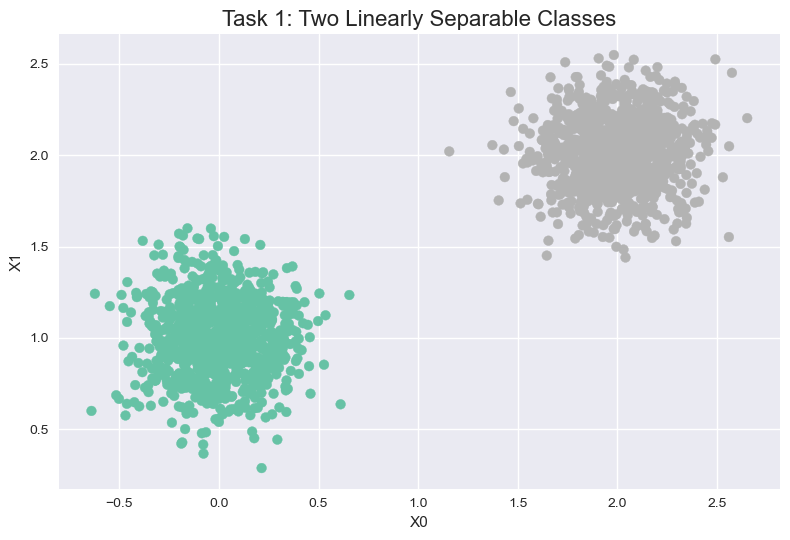

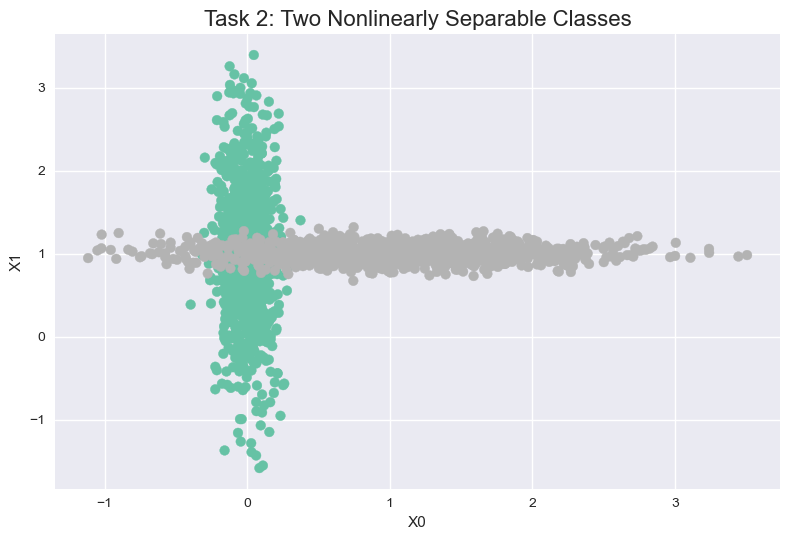

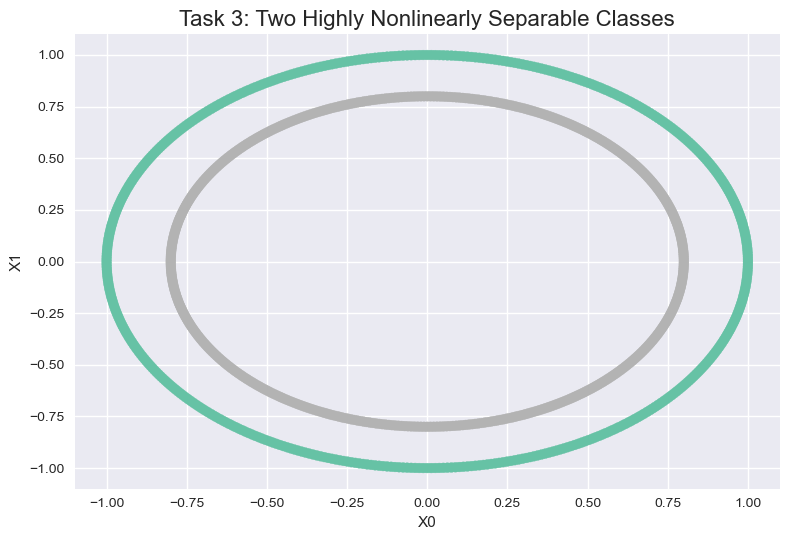

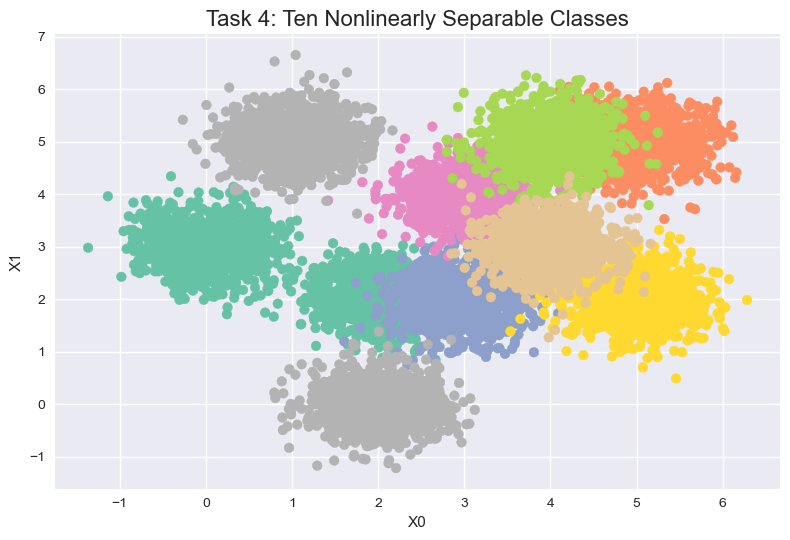

In [18]:
for i, dataset in enumerate(all_datasets):
    show_data(all_datasets[i][0], all_datasets[i][1], all_dataset_names[i])

In [19]:
# path_save = "/Users/andyvarner/Documents/CI_Fall_2022/CI_Projects/NN Project/data"
# filename = os.path.join(path_save, "datasets.pkl")
# pickle.dump(all_datasets,open(filename, "wb"))

# now let's use cross validation

In [20]:
def create_cross_validation(all_samples, all_labels, num_folds):
    
    # Shuffle data and labels
    
    num_samples = len(all_labels)
    
    indices = np.arange(0, num_samples)

    np.random.shuffle(indices)
    
    all_labels = all_labels[indices]
    all_samples = all_samples[indices]
    
    # Create folds
    
    folds = {}
    
    start, stop = 0, num_samples // num_folds
    
    for i in range(num_folds):
        
        test_fold_samples = all_samples[start:stop]
        test_fold_labels = all_labels[start:stop]
        
        if(i == 0):
            train_fold_samples = all_samples[stop:]
            train_fold_labels = all_labels[stop:]
        else:
            
            train_fold_samples = []
            train_fold_labels = []
            
            # Gather train data before test fold
            
            train_fold_samples.append(all_samples[:start])
            train_fold_labels.append(all_labels[:start])
            
            # Gather train data after test fold
            
            train_fold_samples.append(all_samples[stop:])
            train_fold_labels.append(all_labels[stop:])
                
            train_fold_samples = np.vstack(train_fold_samples)
            train_fold_labels = np.hstack(train_fold_labels)
              
        print("CV Fold = %s, Start = %s, Stop = %s, Train Data Shape = %s, Test Data Shape = %s" % (i, start, stop, train_fold_samples.shape, test_fold_samples.shape))
        
        # Update counters
        
        start = stop
        stop = stop + num_samples // num_folds
        
        # Update fold information
        
        folds[i] = {"train": [train_fold_samples, train_fold_labels],
                    "test" :  [test_fold_samples, test_fold_labels]}
        
    return folds

In [21]:
all_folds = []

for i, dataset in enumerate(all_datasets):
    folds = create_cross_validation(all_datasets[i][0], all_datasets[i][1],5)
    print("\n")
    all_folds.append(folds)

CV Fold = 0, Start = 0, Stop = 400, Train Data Shape = (1600, 2), Test Data Shape = (400, 2)
CV Fold = 1, Start = 400, Stop = 800, Train Data Shape = (1600, 2), Test Data Shape = (400, 2)
CV Fold = 2, Start = 800, Stop = 1200, Train Data Shape = (1600, 2), Test Data Shape = (400, 2)
CV Fold = 3, Start = 1200, Stop = 1600, Train Data Shape = (1600, 2), Test Data Shape = (400, 2)
CV Fold = 4, Start = 1600, Stop = 2000, Train Data Shape = (1600, 2), Test Data Shape = (400, 2)


CV Fold = 0, Start = 0, Stop = 400, Train Data Shape = (1600, 2), Test Data Shape = (400, 2)
CV Fold = 1, Start = 400, Stop = 800, Train Data Shape = (1600, 2), Test Data Shape = (400, 2)
CV Fold = 2, Start = 800, Stop = 1200, Train Data Shape = (1600, 2), Test Data Shape = (400, 2)
CV Fold = 3, Start = 1200, Stop = 1600, Train Data Shape = (1600, 2), Test Data Shape = (400, 2)
CV Fold = 4, Start = 1600, Stop = 2000, Train Data Shape = (1600, 2), Test Data Shape = (400, 2)


CV Fold = 0, Start = 0, Stop = 200, Trai

/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


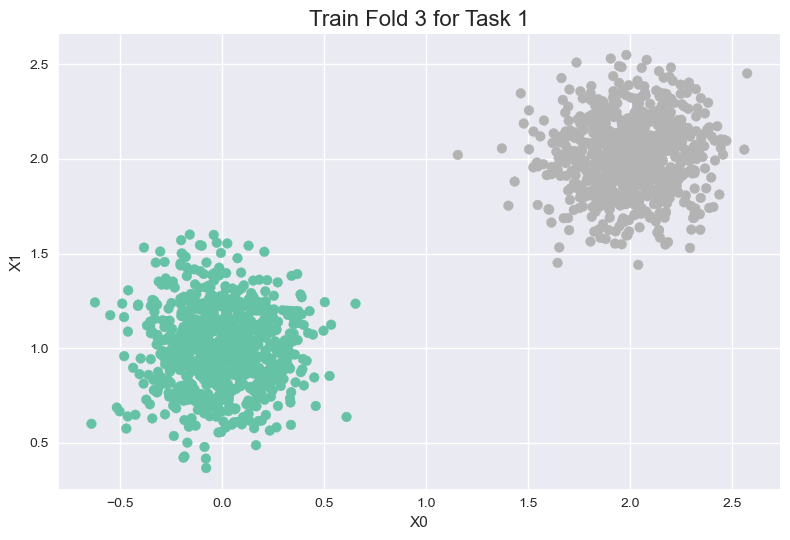

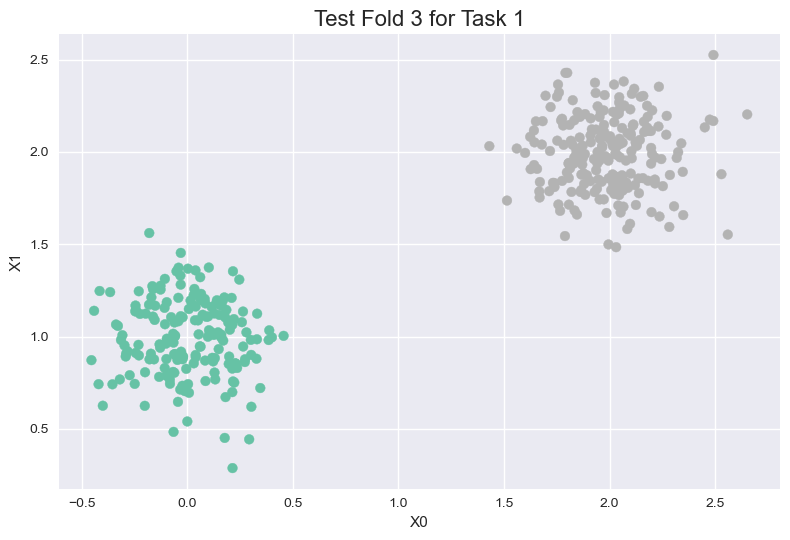

In [22]:
fold_index = 3

all_train_samples, all_train_labels = all_folds[0][fold_index]["train"]

show_data(all_train_samples, all_train_labels, "Train Fold %s for Task 1" % (fold_index))

all_test_samples, all_test_labels = all_folds[0][fold_index]["test"]

show_data(all_test_samples, all_test_labels, "Test Fold %s for Task 1" % (fold_index))

/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


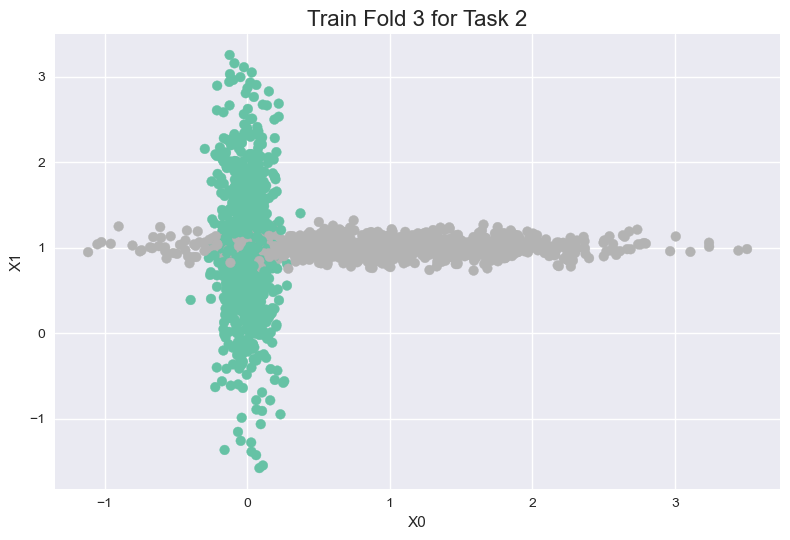

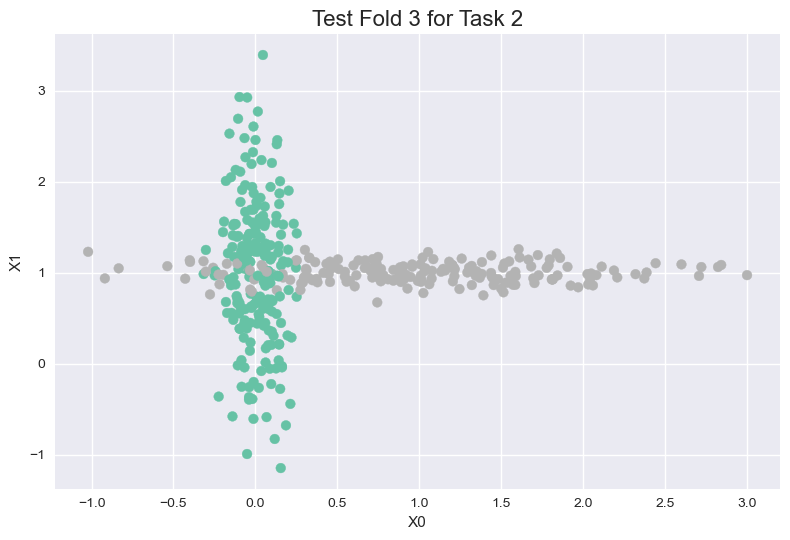

In [23]:
fold_index = 3

all_train_samples, all_train_labels = all_folds[1][fold_index]["train"]

show_data(all_train_samples, all_train_labels, "Train Fold %s for Task 2" % (fold_index))

all_test_samples, all_test_labels = all_folds[1][fold_index]["test"]

show_data(all_test_samples, all_test_labels, "Test Fold %s for Task 2" % (fold_index))

/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


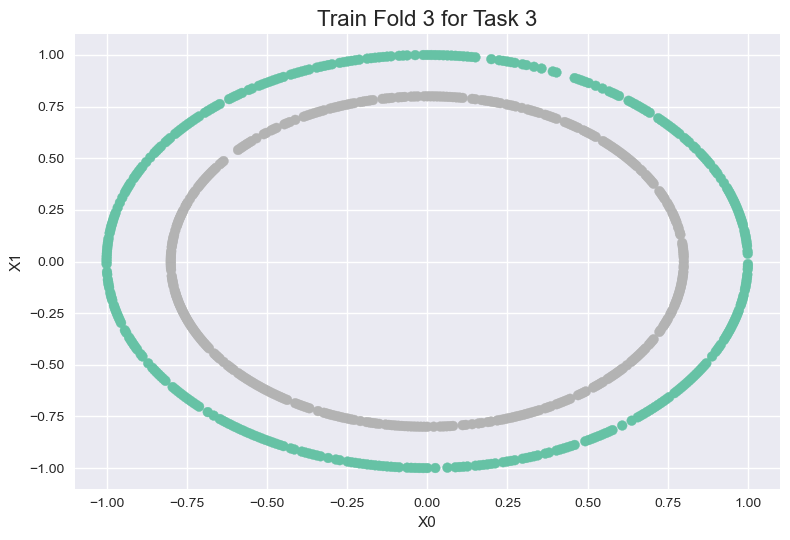

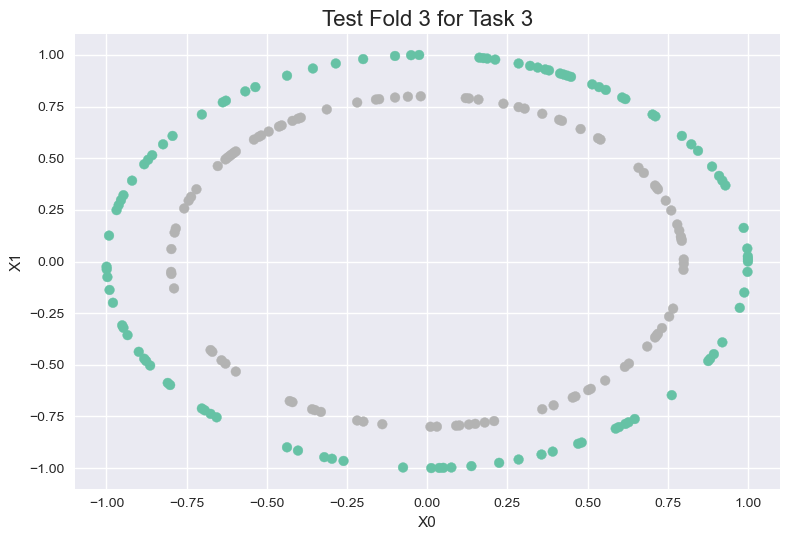

In [24]:
fold_index = 3

all_train_samples, all_train_labels = all_folds[2][fold_index]["train"]

show_data(all_train_samples, all_train_labels, "Train Fold %s for Task 3" % (fold_index))

all_test_samples, all_test_labels = all_folds[2][fold_index]["test"]

show_data(all_test_samples, all_test_labels, "Test Fold %s for Task 3" % (fold_index))

/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/lh/6svpwf5n6zzg8m2whfkn1n2h0000gn/T/ipykernel_9036/2273213398.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


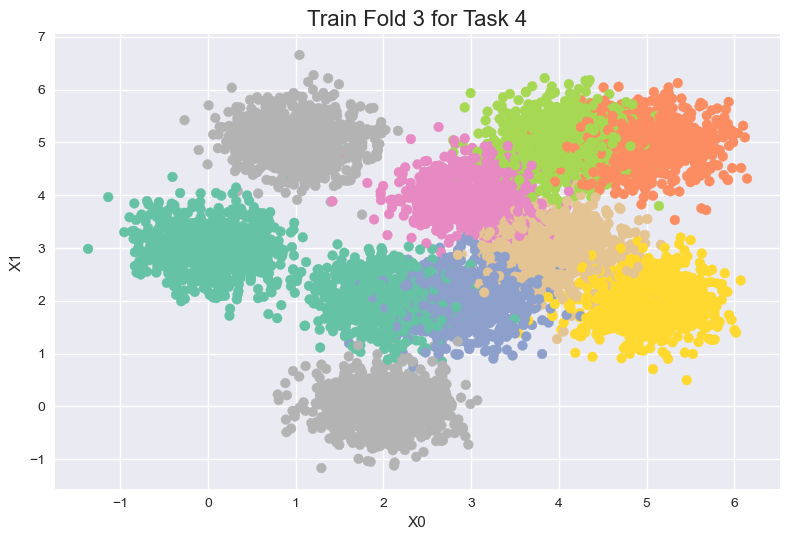

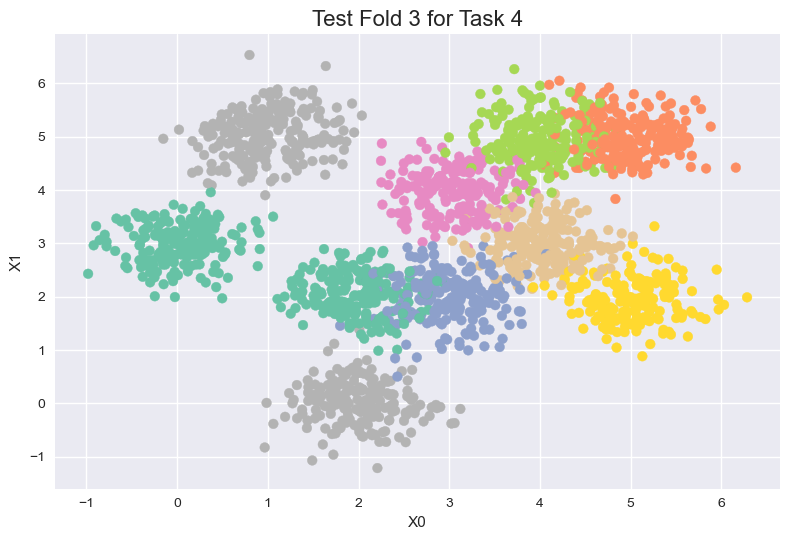

In [25]:
fold_index = 3

all_train_samples, all_train_labels = all_folds[3][fold_index]["train"]

show_data(all_train_samples, all_train_labels, "Train Fold %s for Task 4" % (fold_index))

all_test_samples, all_test_labels = all_folds[3][fold_index]["test"]

show_data(all_test_samples, all_test_labels, "Test Fold %s for Task 4" % (fold_index))

In [56]:
path_save = "/Users/andyvarner/Documents/CI_Fall_2022/CI_Projects/NN Project/data"
filename = os.path.join(path_save, "folds.pkl")
pickle.dump(all_folds,open(filename, "wb"))

In [55]:
#print(len(all_datasets)) #all_samples, all_labels
# print(num_classes)
for i in range(len(all_datasets)):
    #print(len(np.unique(dataset[i][1])))
    print(len(np.unique(all_datasets[i][1])))

4
2
2
2
10
